In [1]:
import numpy as np;
import matplotlib as mp;
import matplotlib.pyplot as plt;
import matplotlib.patches as patches;
import pandas as pd;
import math;

## Covariance and correlation

Let us calculate the covariance and correlation for real data using Pandas. First we specify the data file name and have a "peek" at the data frame:

In [3]:
data_file = 'ASC_cg_export.tsv';
pd.read_csv(data_file,sep = '\t',low_memory=False)

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
0,0,0.076000,0.031020,0.681708,0.136734
1,1,0.056540,0.041740,0.309939,0.833063
2,2,0.035931,0.027603,0.336823,0.779083
3,3,0.068871,0.029245,0.637028,0.220080
4,4,0.055457,0.031569,0.648768,0.158911
...,...,...,...,...,...
459,459,0.638267,0.725329,0.562665,0.682982
460,460,0.029312,0.037880,0.174917,0.820928
461,461,0.077343,0.030169,0.656111,0.164263
462,462,0.040083,0.032533,0.211228,0.763911


Now let's actually read the data into a pandas data frame.

In [4]:
data_frame = pd.read_csv(data_file,sep = '\t',low_memory=False);

Let's check the column names:

In [5]:
data_frame.columns

Index(['patient_id', 'cg00510787', 'cg03169527', 'cg23256971', 'cg08585897'], dtype='object')

Before actually calculating the variance-covariance matrix, let's simply look at scatter plots, where we plot the value in a given column as a function of the value in another column.

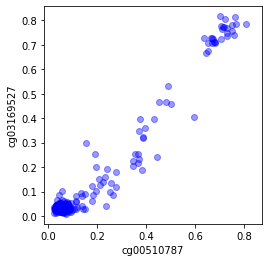

In [6]:
plt.clf();
plt.plot(data_frame['cg00510787'][:],data_frame['cg03169527'][:],'bo', alpha =0.4);
plt.xlabel('cg00510787');
plt.ylabel('cg03169527');
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');

Now create a grid of scatter plots as the figure indicates. Try to set the axis labels from the dataset.

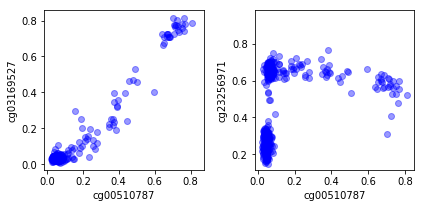

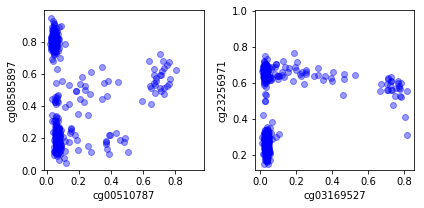

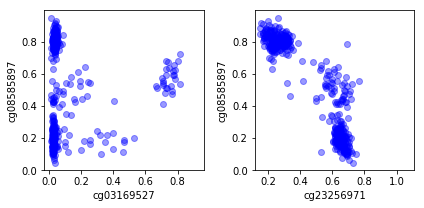

In [5]:
Your code

Let's now calculate the co-variance and the correlation matrices.

In [6]:
YOUR CODE for covariance

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
patient_id,17980.000000,0.178541,0.440353,-1.510975,3.369657
cg00510787,0.178541,0.028208,0.029073,0.010195,-0.005973
cg03169527,0.440353,0.029073,0.031262,0.007102,-0.001742
cg23256971,-1.510975,0.010195,0.007102,0.039455,-0.053103
cg08585897,3.369657,-0.005973,-0.001742,-0.053103,0.083898


In [7]:
"your code for correlation: what do you expect in the diagonal"

'your code for correlation: what do you expect in the diagonal?'

Of course, covariance can be calculated also in numpy. To test this, let us first generate a multinomial data set. First we define the parameters of multinomial distribution, $N$ and a couple of $p_i$, where $\sum_i p_i=1$.

In [8]:
N_mn = YOUR_CODE
p_mn = YOUR_CODE # set a list of likelihoods, eg. 4 probabilities
print(sum(p_mn))

In [9]:
multinom_data = YOUR_CODE_FOR_LIST_OF_RANDOM_MULTINOMIAL_DATA, use the built in routines from numpy
#print(multinom_data);

In [12]:
multinom_cov_matr = np.cov(np.transpose(multinom_data));
multinom_cov_matr

array([[ 1.56666667, -1.75555556, -0.51111111,  0.7       ],
       [-1.75555556,  5.37777778, -2.46666667, -1.15555556],
       [-0.51111111, -2.46666667,  4.17777778, -1.2       ],
       [ 0.7       , -1.15555556, -1.2       ,  1.65555556]])

As a comparison, let's also calculate the theoretical variance-covariance matrix.

In [11]:
theor_cov_matr = [[list_of_lists]] # lookup the formulae in wikipedia
for line in theor_cov_matr:
    print(line);

[1.8, -0.4, -0.6, -0.8]
[-0.4, 3.2, -1.2, -1.6]
[-0.6000000000000001, -1.2000000000000002, 4.199999999999999, -2.4000000000000004]
[-0.8, -1.6, -2.4, 4.8]


# Inequalities

Let us assume IID Bernoulli random variables such as coin flips, where we do not know the parameter $p$, and only have access to the generated sample.

Our best guess (estimate) for $p$ based on the observed data is given by
\begin{equation}
\widehat{p}=\overline{X_n}=\frac{1}{n}\sum_{i=1}^n x_i.\nonumber
\end{equation}


Hoeffding's inequality states that as $n$ is increased, this estimate is getting exponentialy close to the true value of $p$, since
\begin{equation}
P\left(\left| \overline{X_n}- p\right| \geq \epsilon\right)\leq\alpha= 2 e^{-2n\epsilon^2}.\nonumber
\end{equation}

Based on that we can construct an interval (called confidence interval) around the estimate $\widehat{p}=\overline{X_n}$ for which we can write down a guaranteed lower bound on the probability that the true $p$ falls within the interval. 

Let us choose the guaranteed lower bound as $1-\alpha$, where $\alpha$ is a parameter. For a fixed $\alpha$, the interval can be given as $[\overline{X_n}-\epsilon,\overline{X_n}+\epsilon]$ where  
\begin{equation}
\epsilon = \sqrt{ \ln( 2/\alpha)/(2n)}, 
\end{equation}
and in such a setting find the formula for the probability, that the interval covers the $p$ value.
\begin{equation}
P([X_n-\epsilon,X_n+\epsilon]) \ge 1-\alpha
\end{equation}




Let us test this by actually generating Bernoulli random variables and measuring the **coverage** of the above interval, where coverage is the ratio of experiments where the true $p$ did fall into the interval.

First, we define the parameters.

In [2]:
p_true = 0.4;       # the p parameter of the Bernoulli distribution
num_flips = 50;   # the number of data points in one experiment
num_series = 1000;   # the number of experiments.
alpha = 0.05;

Let's just try out generating a small sample.

In [4]:
Bernoulli_samp = np.random.choice([0,1], p=[1-p_true,p_true], size=num_flips  ) # use numpy!
print(Bernoulli_samp);

[0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0]


OK, it seems working, let's now generate the longer samples.

In [6]:
B_series = [list(np.random.choice([0,1], p=[1-p_true,p_true], size=num_flips  )) for i in range(0,num_series)];

And finally let's see how does the coverage depend on the number of flips. 
\begin{equation}
P\left(\left| \overline{X_n}- p\right| \lt \epsilon\right)\leq 1-\alpha= 1-2 e^{-2n\epsilon^2}.\nonumber
\end{equation}

In [8]:
cover_list,epsilon_list = [],[];
cover_list.clear();
epsilon_list.clear();
for n in range(1,num_flips):
    epsilon = math.sqrt(math.log(2.0/alpha)*0.5/n)
    epsilon_list.append(epsilon);
    cover_indicator = [ 1 if(np.abs(p_true-np.mean(b_s[0:n]))<epsilon) else 0 for b_s in B_series];
    coverage = sum(cover_indicator)/num_series
    cover_list.append(coverage);    
    #print('n=',n,'coverage=',coverage);    

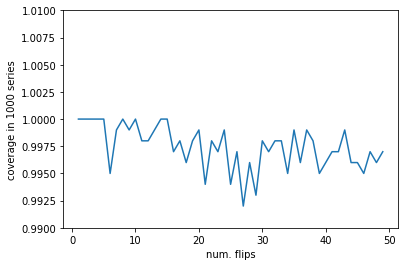

In [9]:
plt.clf();
x_list = range(1,len(cover_list)+1);
plt.plot(x_list,cover_list);
plt.ylim(0.99,1.01);
plt.xlabel('num. flips');
plt.ylabel('coverage in '+str(num_series)+' series');
plt.show();

In [19]:
sum([ list(b_s)  for b_s in B_series if(np.abs(p_true-np.mean(b_s[0:n]))>epsilon)][0])

11

In [20]:
50*.4

20.0